<a href="https://colab.research.google.com/github/nevradiker/DATA201/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction:
For this project, I will be using a dataset sourced from Spotify, which contains information on 2,000 songs released between the years 1998 and 2020. The dataset includes a variety of columns that describe different characteristics of each track.
Some of the key variables include the tempo of the song, whether the track contains explicit content, the overall loudness of the song, and the genre.

In [1116]:
# Importing Pandas and Numpy
import pandas as pd
import numpy as np

In [1117]:
# Loading in my dataset
songs = pd.read_csv('spotifysongs.csv')

In [1118]:
# First five rows of data
songs.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [1119]:
# Info + data types + removing NAs
songs = songs.dropna()
songs.info()
songs.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


,0
artist,object
song,object
duration_ms,int64
explicit,bool
year,int64
popularity,int64
danceability,float64
energy,float64
key,int64
loudness,float64


In [1120]:
# Filtering songs by genres so I can focus on five that I was interested in.
genres = ['hip hop', 'country', 'rock', 'pop', 'R&B']

filtered_songs = songs[songs['genre'].isin(genres)]

print(filtered_songs.head)

<bound method NDFrame.head of                artist                                              song  \
0      Britney Spears                            Oops!...I Did It Again   
4              *NSYNC                                       Bye Bye Bye   
6              Eminem                               The Real Slim Shady   
10    Gigi D'Agostino                                  L'Amour Toujours   
11          Eiffel 65  Move Your Body - Gabry Ponte Original Radio Edit   
...               ...                                               ...   
1994      Post Malone                       Goodbyes (Feat. Young Thug)   
1995   Jonas Brothers                                            Sucker   
1996     Taylor Swift                                      Cruel Summer   
1998        Sam Smith            Dancing With A Stranger (with Normani)   
1999      Post Malone                                           Circles   

      duration_ms  explicit  year  popularity  danceability  energy  

In [1121]:
# Imported Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

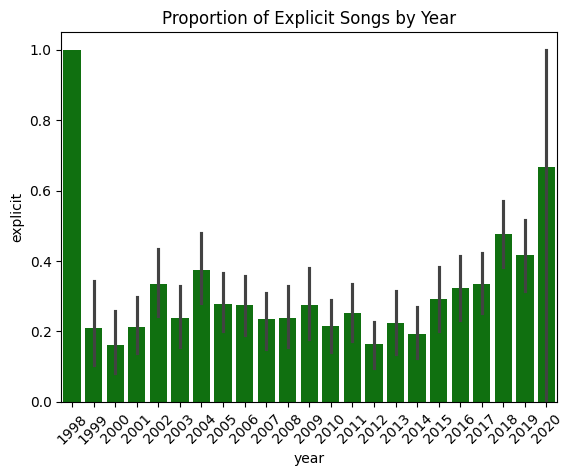

In [1122]:
# Bar plot showing the proportion of explicit songs based on the year they were released
sns.barplot(x = 'year', y = 'explicit', data = songs, color = 'green')
plt.xticks(rotation=45)
plt.title('Proportion of Explicit Songs by Year')
# Create the plot
plt.show()

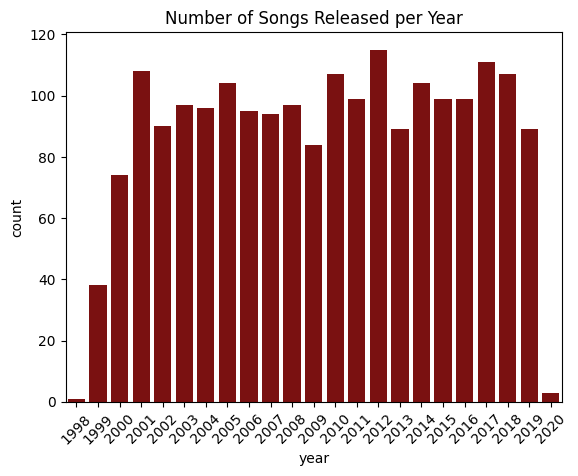

In [1123]:
# Bar plot of the amount of songs released per year
sns.countplot(data = songs, x = 'year', color = 'darkred', order = sorted(songs['year'].unique()))
plt.xticks(rotation=45)
plt.title('Number of Songs Released per Year')
# Create the plot
plt.show()

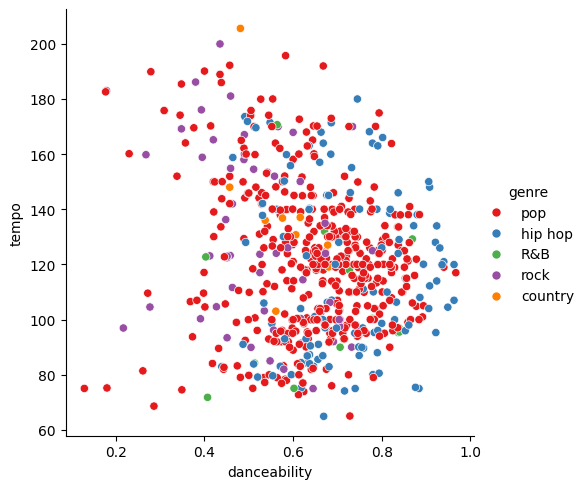

In [1124]:
# Create scatterplot of tempo vs. danceability
sns.relplot(x = "danceability", y = "tempo",
            data = filtered_songs, kind = "scatter", hue = 'genre', palette = 'Set1')

# Showing the plot
plt.show()

In [1125]:
# Nonparametric inference of the Median (bootstrapping)

# Using 10% of the data for bootstrapping
danceability_values = songs['danceability'].dropna().values
data_size = len(danceability_values)
sample_size = int(0.10 * data_size)

# Creating some random samples + median of danceability
median_danceability = []

for i in range(1000):
    temp_sample = np.random.choice(danceability_values, 200)
    sample_median = np.median(temp_sample)
    median_danceability.append(sample_median)

# Calculating bootstrapped median
boot_median = np.median(median_danceability)
print(f"Median Danceability = {boot_median}")


Median Danceability = 0.6765000000000001


In [1126]:
# Confidence interval - 95%
confi_int = np.percentile(median_danceability, [2.5, 97.5])
confi_int


array([0.656, 0.7  ])

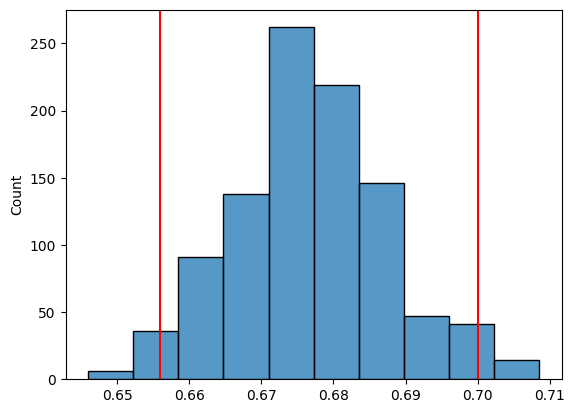

In [1127]:
sns.histplot(median_danceability, bins = 10)
for endpoint in confi_int:
    plt.axvline(endpoint, color='red')

In [1128]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [1129]:
songs_filtered = songs[['tempo', 'danceability']].dropna()

# Features and target
X = songs_filtered[['tempo']]
y = songs_filtered['danceability']

X.shape
y.shape

(2000,)

In [1130]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30)

In [1131]:
# Train the linear regression model
LinReg = LinearRegression()

In [1132]:
X_train.shape, y_train.shape

((1400, 1), (1400,))

In [1133]:
X_test.shape, y_test.shape

((600, 1), (600,))

In [ ]:
# Linear regression
LinReg.fit(X_train, y_train)

In [1135]:
y_predicted = LinReg.predict(X_test)

In [1136]:
mean_sq_error = np.mean( (y_test - y_predicted) **2 )
print(mean_sq_error)

0.019412266062531186


In [1137]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_true = y_test, y_pred = LinReg.predict(X_test)))

0.019412266062531186


In [1138]:
#Print the mean squared error
print(mean_squared_error(y_true = y_train, y_pred = LinReg.predict(X_train)))

0.01900249436235317


In [1139]:
# Checking what % of the variability in danceability can be explained by tempo
LinReg.score(X_test, y_test)

# The linear regression model explains about 4.36% of the variance in the danceability variable, given the tempo of the song.

0.043599067643176226

(array([  4.,   3.,  17.,  35.,  70., 112., 133., 119.,  82.,  25.]),
 array([-0.50863705, -0.4276522 , -0.34666735, -0.2656825 , -0.18469764,
        -0.10371279, -0.02272794,  0.05825691,  0.13924176,  0.22022661,
         0.30121146]),
 <BarContainer object of 10 artists>)

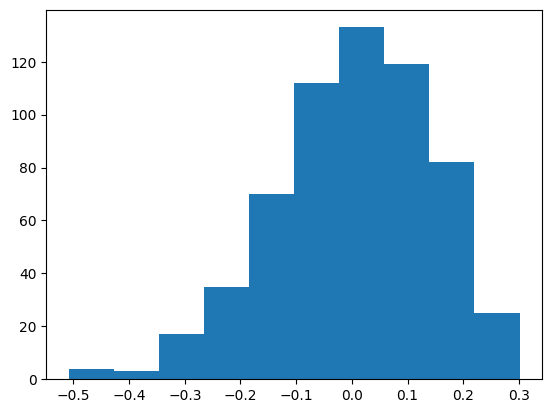

In [1140]:
# Create the bar plot
plt.hist(y_test - y_predicted)

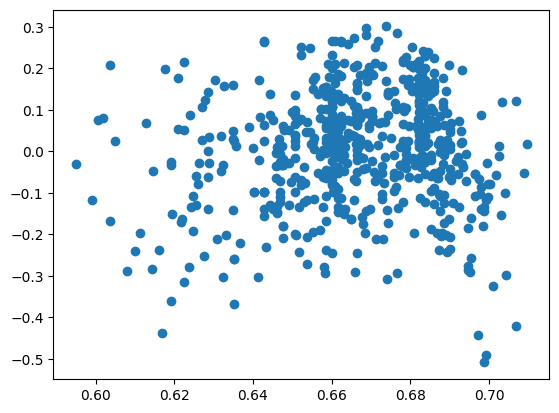

In [1141]:
plt.scatter(y_predicted, y_test - y_predicted)

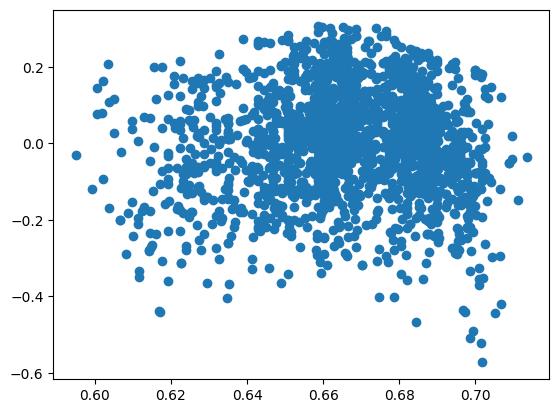

In [1142]:
plt.scatter(LinReg.predict(X), y - LinReg.predict(X))

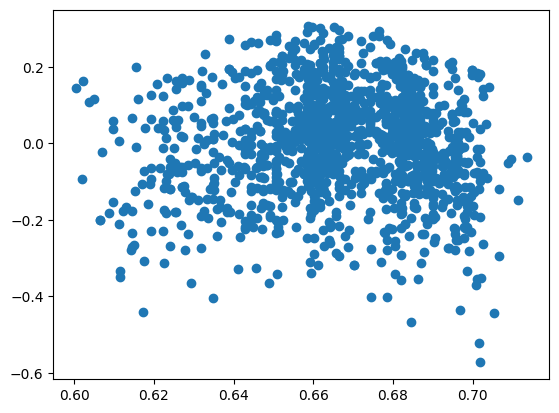

In [1143]:
plt.scatter(LinReg.predict(X_train), y_train - LinReg.predict(X_train))

In [1144]:
# Linear regression coefficient
print(LinReg.coef_)

# As the tempo increases, the danceability of the song decreases. Since the coefficient value is so small,
# we can assume that the tempo doesn’t have a much of an effect on the danceability of a song.

[-0.00078612]


In [1145]:
# Linear regression intercept
print(LinReg.intercept_)

0.7607500705745669


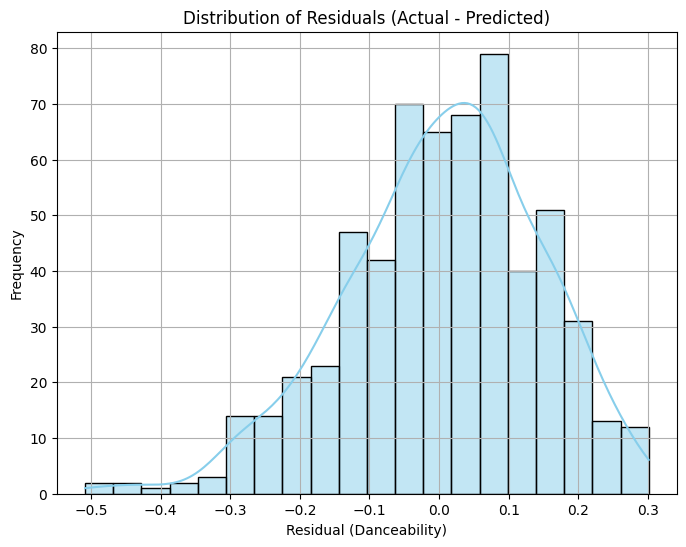

In [1146]:
plt.figure(figsize=(8,6))
sns.histplot(y_test - y_predicted, bins=20, kde=True, color='skyblue')
plt.title('Distribution of Residuals (Actual - Predicted)')
plt.xlabel('Residual (Danceability)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

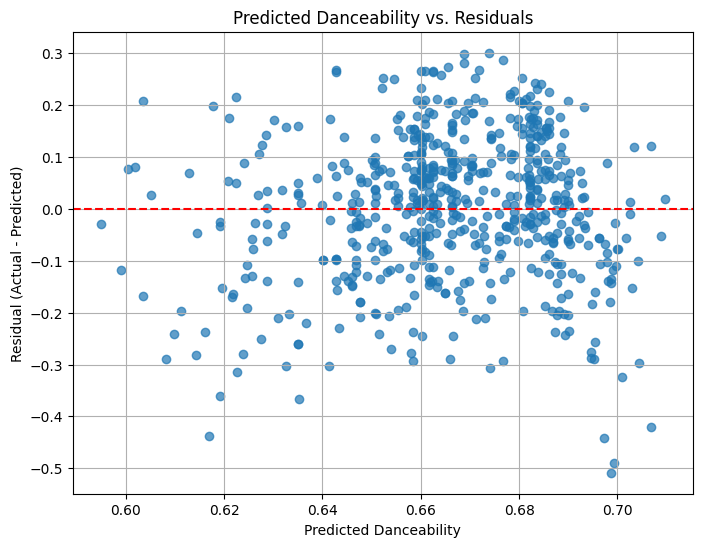

In [1147]:
plt.figure(figsize=(8,6))
plt.scatter(y_predicted, y_test - y_predicted, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Predicted Danceability vs. Residuals')
plt.xlabel('Predicted Danceability')
plt.ylabel('Residual (Actual - Predicted)')
plt.grid(True)
plt.show()


In [1148]:
# Regression Coefficients
print("Coefficient (Tempo):", LinReg.coef_[0])
print("Intercept:", LinReg.intercept_)

# R² score interpretation
r_squared = LinReg.score(X_test, y_test)
print(f"R² Score: {r_squared:.2f}")


Coefficient (Tempo): -0.0007861213727042822
Intercept: 0.7607500705745669
R² Score: 0.04
